In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# AM6020 Assignment 2

## Submission

This assignment must be **your own work**. Remember the Plagarism Policy that you agreed to (near the top of the AM6020 Modules page on Canvas).

Please submit your assignment electronically:
- Save the notebook (*studentID*_A2.ipynb).
- Upload the notebook to the Assignment 2 submission on Canvas.

**If you submit this assignment in late or to the wrong location, a mark of zero will be recorded unless you make a case for mitigation by submitting supporting documentation (e.g. medical certificates) to the School of Mathematical Sciences Office <sms@ucc.ie>.**


*Note: When solving the tasks below, you can look up further methods and functions, not necessarily covered in the AM6020 lectures, but only methods and functions from the standard library or those modules we covered. In other words, for this assignment you should only ever import math, random, NumPy and/or Matplotlib.*

## Part 1: Plotting data (7 marks)

The data file *energy_data.csv* contains a breakdown of energy sources being used in Ireland from 1990-2018. It can be downloaded from the Assigment 2 page on Canvas.

Read this data into a numpy array and plot the year usage of each fuel type, all on the same axes (i.e. in the one figure). Include a legend to make it easy to see what curve corresponds to what fuel type.

In [7]:
# Write your code here. Insert more cells as needed.
energy = np.genfromtxt("energy_data.csv", delimiter = ",", skip_header = 2)
#print(energy)

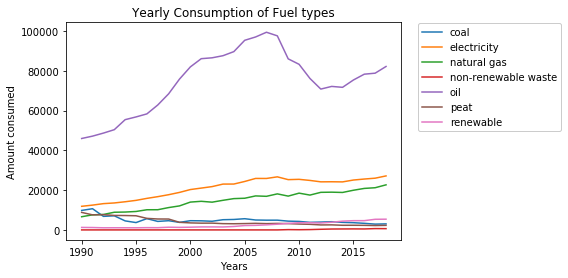

In [37]:
# there's probably a less clunky way of doing this
plt.plot(energy[:, 0], energy[:, 1], label = "coal")
plt.plot(energy[:, 0], energy[:, 2], label = "electricity")
plt.plot(energy[:, 0], energy[:, 3], label = "natural gas")
plt.plot(energy[:, 0], energy[:, 4], label = "non-renewable waste")
plt.plot(energy[:, 0], energy[:, 5], label = "oil")
plt.plot(energy[:, 0], energy[:, 6], label = "peat")
plt.plot(energy[:, 0], energy[:, 7], label = "renewable")

plt.title("Yearly Consumption of Fuel types")
plt.xlabel("Years")
plt.ylabel("Amount consumed")
plt.legend(loc =(1.05, 0.5), framealpha = 1);

Plot the total year energy consumption; that is, usage of all the fuel types together for *each year*.

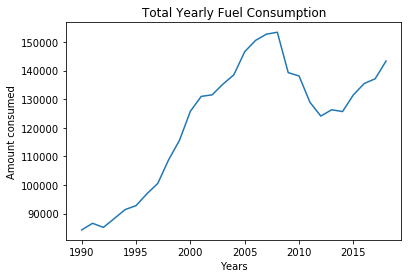

In [36]:
# Write your code here. Insert more cells as needed.
years = energy[:, 0] 

cons = list()
for i in range(len(energy)):
    yrsum = (energy[i, 1:].sum())
    cons.append(yrsum)
cons = np.array(cons)

plt.title("Total Yearly Fuel Consumption")
plt.xlabel("Years")
plt.ylabel("Amount consumed")
plt.plot(years, cons);

Now create a stackplot to represent the data.

How do you make a stackplot? Good question. As we did in Lecture 7, visit the [Matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and find an example of a stackplot. Adapt the code you find there for the present data.

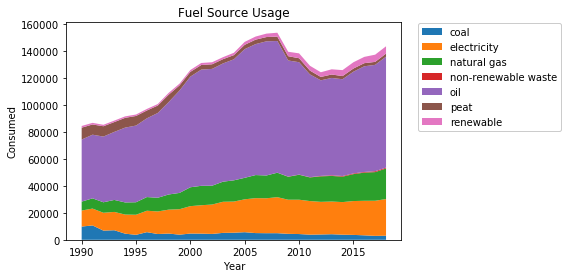

In [38]:
# Write your code here. Insert more cells as needed.

year = energy[:, 0]
consumption_by_source = {
    "coal": energy[:, 1],
    "electricity" : energy[:, 2],
    "natural gas" : energy[:, 3],
    "non-renewable waste" : energy[:, 4],
    "oil" : energy[:, 5],
    "peat" : energy[:, 6],
    "renewable" : energy[:, 7]}
fig, ax = plt.subplots()
ax.stackplot(year, consumption_by_source.values(), labels = consumption_by_source.keys())

ax.legend(loc =(1.05, 0.5), framealpha = 1)
ax.set_title('Fuel Source Usage')
ax.set_xlabel('Year')
ax.set_ylabel('Consumed')

plt.show()

## Part 2: Dictionary (4 marks)

Below is a dictionary that summarises the stock at a certain supermarket. Notice how the values of this dictionary are dictionaries themselves.

In [8]:
supermarket = { "milk": {"quantity": 20, "price": 1.19},
               "biscuits":  {"quantity": 32, "price": 1.45},
               "butter":  {"quantity": 20, "price": 2.29},
               "cheese":  {"quantity": 15, "price": 1.90},
               "bread":  {"quantity": 15, "price": 2.59},
               "cookies":  {"quantity": 20, "price": 4.99},
               "yoghurt": {"quantity": 18, "price": 3.65},
               "apples":  {"quantity": 35, "price": 3.15},
               "oranges":  {"quantity": 40, "price": 0.99},
               "bananas": {"quantity": 23, "price": 1.29}}

Write a function to return the total cost if you were to purchase everything in the supermarket.

In [9]:
# Define your function here. 
def total_cost(supermarket):
    
    total = 0
    
    for i in supermarket:
        
        quant = supermarket[i]["quantity"]
        price = supermarket[i]["price"]
        total += quant * price

    return(total)


In [10]:
# Call your function here.
total_cost(supermarket)

528.37

Now imagine that there are five people who all want to buy supplies from this supermarket. Create a function that will return a total cost for each supermarket customer. 

Below are their shopping lists (or rather shopping dictionaries).

In [11]:
Betty = {'bananas' : 6, 'yoghurt': 4, 'bread': 1, 'cheese': 2, 'milk': 2}
John = {'apples': 7, 'bananas': 7, 'oranges': 10}
Samantha = {'milk': 3, 'bread': 2, 'butter': 2, 'cheese': 3, 'yoghurt':5, 'apples': 10, 'bananas': 10}
Gerald = {'cookies': 20, 'milk': 2}

In [12]:
customers = {"Betty" : {'bananas' : 6, 'yoghurt': 4, 'bread': 1, 'cheese': 2, 'milk': 2},
             "John" : {'apples': 7, 'bananas': 7, 'oranges': 10},
             "Samantha" : {'milk': 3, 'bread': 2, 'butter': 2, 'cheese': 3, 'yoghurt':5, 'apples': 10, 'bananas': 10},
             "Gerald" : {'cookies': 20, 'milk': 2}}

Let the input to the function be a single dictionary that contains the above four shopping dictionaries as dictionary values. Let the output (i.e. the total cost for each customer) also be a dictionary.

In [15]:
# Define your function here.
bill = {}

def checkout_price(customers):
    for key in customers:
        bill[key] = 0
        
        
        checkout = 0
        shop_list = (customers[key])
    
        for i in shop_list:     
            price = supermarket[i]["price"]
            quant = shop_list[i]
        
            checkout += quant*price    
        
        bill[key] = checkout
        
    return(bill)

In [16]:
# Call your function here
checkout_price(customers)

{'Betty': 31.11,
 'John': 40.980000000000004,
 'Samantha': 81.68,
 'Gerald': 102.18}

## Part 3: Blurring images (8 marks)

Write your own code to apply a *mean blur* to an image by kernel convolution. In other words, do not use openCV.

Apply your code to the grayscale image *cactus.jpg* to be downloaded from the Assignment 2 page on Canvas.

To start, only use a $3\times 3$ kernel.

Plot both the original and the blurred image side-by-side. Do you notice much of a difference?

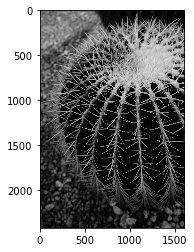

In [23]:
# Write your code here. Insert more cells as needed.
img = plt.imread('cactus.jpg')
plt.imshow(img, cmap = "gray");

In [40]:
def blur(img):
    # 3x3 kernel
    ksize = 3
    kernel = (1/9.0) * np.ones((3, 3))

    
    n, n = kernel.shape

    y, x = img.shape
    y = y - n + 1
    x = x - n + 1
    img_blur = np.zeros((y,x))
    
    for i in range(y):
        for j in range(x):
            img_blur[i][j] = np.sum(img[i:i+n, j:j+n]*kernel) 
            
    fig = plt.figure()
    I1 = fig.add_subplot(1, 2, 1)    
    plt.imshow(img, cmap = "gray")
    I1.title.set_text("Original Image")
    
    I2 = fig.add_subplot(1, 2, 2)
    plt.imshow(img_blur, cmap = "gray")
    I2.title.set_text("3x3 Mean Blur")
    
    return

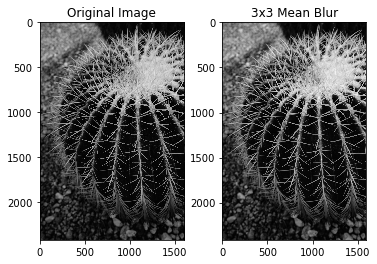

In [41]:
blur(img)

The 3x3 kernel applies an extremely mild blur effect which is barely noticable save for the very top of the cactus where the thorns form a white patch. Much larger Kernel sizes will allow us to apply a more obvious blur effect, as demonstrated below.

Now adapt your code for a $n\times n$ kernel. Do you notice a difference for a larger sized kernel? Maybe try a few different sizes.

In [24]:
# Write your code here. Insert more cells as needed.

def custom_blur(img):
    # Custom nxn kernel specified by the user.
    ksize_custom = int(input())
    custom_kernel = (1/(ksize_custom**2) * np.ones((ksize_custom, ksize_custom))) 
    
    n, n = custom_kernel.shape

    y, x = img.shape
    y = y - n + 1
    x = x - n + 1
    img_out = np.zeros((y,x))
    
    for i in range(y):
        for j in range(x):
            img_out[i][j] = np.sum(img[i:i+n, j:j+n]*custom_kernel)
    
    fig = plt.figure()
    I1 = fig.add_subplot(1, 2, 1)    
    plt.imshow(img, cmap = "gray")
    I1.title.set_text("Original Image")
    
    I2 = fig.add_subplot(1, 2, 2)    
    plt.imshow(img_out, cmap = "gray")
    I2.title.set_text("User-specified nxn Kernel Mean Blur")
    
    return

30


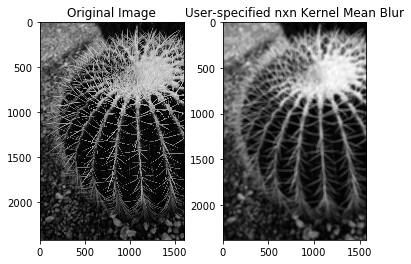

In [25]:
custom_blur(img)

Above is a function that allows the user to specify kernel size which will be applied to the image in order to blur it. Using values of >=25 seem to give very noticeable blur effects.
